In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import numpy as np
from matplotlib import pylab as plt
from scipy import stats
from ipywidgets import interactive, Label

# Inferential statistics

Imagine we obtained some data, for example we gathered the weight of $n$ male human adults in the US. Such a collection is called a sample and we can use the obtained data in two ways:<br>

- **descriptive statistics**: gives a detailed description of the **sample** - for example compute the sample mean, sample variance, or other sample statistics.


- **inferential statistics**: estimate **population** properties from a sample taken from that population. In our example, say the population parameter we wanted to infer/estimate is the average weight of an American man.<br>
There are two general “philosophies” in inferential statistics, frequentist inference and Bayesian inference. In this notebook we will use the frequentist approach. Confidence intervals are one way to estimate a population parameter.  Another way is to perform **hypothesis testing**.

## Statistical hypothesis testing

A hypothesis test involves collecting and evaluating sample data and then making a decision as to whether or not the data supports a claim that is made about the population. In our example we estimate a population parameter (the average weight of an American man) from the sample statistic and we want to test a hypothesis that states something about the population (e.g. that average weight of an American man equals 190 lbs). Let's go through the steps of hypothesis testing for our example, which will lead us to the **Student's t-test**:

##### 1) State the relevant **null** and **alternative** hypotheses.

Null hypothesis $H_0$: average weight of an American man = 190 lbs<br>
Alternative hypothesis $H_1$: average weight of an American man $\neq$ 190 lbs

##### 2) Consider the **assumptions** being made about the sample.
- measured variable (human weight) is a continuous variable <br>
- each observation is independent of the other observations and all observations come from the same distribution (independent identically distributed observations)<br>
- measured variable has a normal distribution (appropriate statistical methods exist for testing this assumption, for example the Kolmogorov Smirnov non-parametric test)

##### 3) State the relevant **test statistic**. <br>

The relevant test statistic here is 

$$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$

where $\bar{x}$ is the sample mean, $\mu$ is the mean we are testing against, $s$ is the sample standard deviation of the sample and $n$ is the sample size (thus $s/\sqrt{n}$ is standard error of the mean).

##### 4)  Determine the distribution of the test statistic under the null hypothesis from the assumptions. <br>

The sampling distribution of the $t$-value is a **Student t-distribution** with $n - 1$ degrees of freedom. If we had access to the population $\sigma$ and we used that instead of $s$, $t$ would be normally distributed with expected value 0 and variance 1. As $n \to \infty$, the t-distribution approaches the normal distribution.


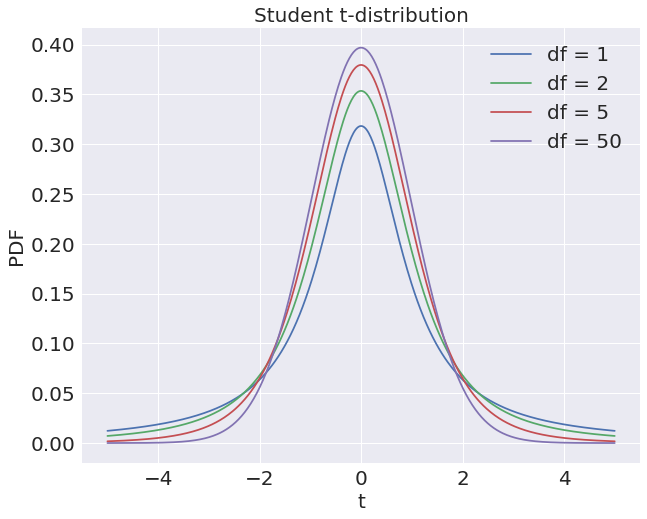

In [3]:
from scipy.stats import t

t_values = np.linspace(-5, 5, 500)
fig = plt.figure(figsize=(10,8))
for df in [1, 2, 5, 50]:
    plt.plot(t_values, t.pdf(t_values, df), label = 'df = ' + str(df))
    plt.legend(fontsize = 20)
    plt.xlabel('t', fontsize = 20)
    plt.ylabel('PDF', fontsize = 20)
    plt.xticks(size=20)
    plt.yticks(size=20)
title = plt.title('Student t-distribution', fontsize = 20)

##### 5) Select a **significance level** ($\alpha$).

Significance level is a probability threshold below which the null hypothesis will be rejected. Commonly it is set to $\alpha$ = 0.05.

##### 6) Compute from the observations the observed value $t$ of the test statistic.

Suppose we collected $n$ = 50 measurements, we computed $\bar{x}$ and $s$ and obtained $t_{obs} = 1.7$.

##### 7)  Calculate the **p-value**. 

This is the probability that a given observation (or a more significant result) would occur under the null hypothesis: 

$$
p\text{-value = the probablity that  } \lvert t \rvert > \lvert t_{obs} \rvert
$$

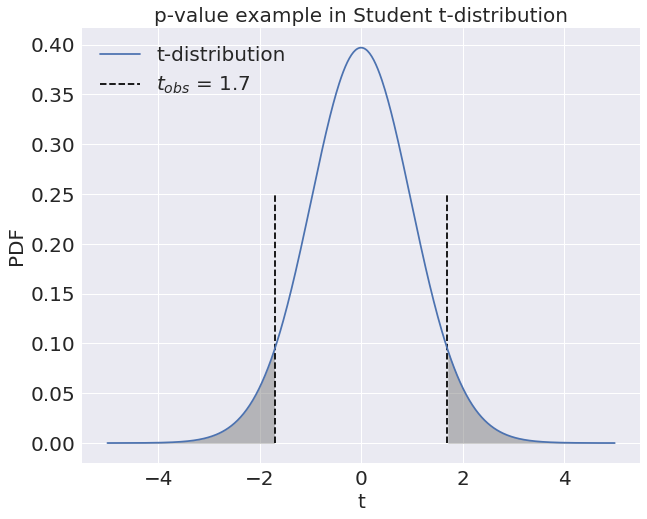

In [4]:
t_obs = 1.7
n = 50
df = n - 1

t_dist = t.pdf(t_values, df)

fig = plt.figure(figsize=(10,8))
plt.plot(t_values, t_dist, label = 't-distribution')
plt.vlines(t_obs, 0, 0.25, linestyles='--', color='k', label= r'$t_{obs}$'+' = {:.1f}'.format(t_obs))
plt.vlines(-t_obs, 0, 0.25, linestyles='--', color='k')
plt.fill_between(t_values, 0, t_dist, where=(t_values <= -t_obs), color='grey', alpha=0.5)
plt.fill_between(t_values, 0, t_dist, where=(t_values >= t_obs), color='grey', alpha=0.5)
plt.legend(loc = 2, fontsize = 20)
plt.xlabel('t', fontsize = 20)
plt.ylabel('PDF', fontsize = 20)
plt.xticks(size=20)
plt.yticks(size=20)
title = plt.title('p-value example in Student t-distribution', fontsize = 20)

For our example with $t_{obs} = 1.7$ and $n = 50$, we obtain $p = 0.095471$.

This is an example of a **two-tailed test**. Alternatively if the hypothesis $H_1$ stated that average weight of an American man is *less than* 190, we would use a left-tailed test (the opposite would require a right-tailed test).

##### 8)  Reject the null hypothesis in favor of the alternative hypothesis, if  p-value < $\alpha$.

We chose $\alpha = 0.05$ and we the obtained $p=0.095471$. So $p > \alpha$ therefore we can not reject the null hypothesis that average weight of an American man equals 190 lbs.

# Student's t-tests

### One sample t-test 

A one sample t-test is the example we just demostrated, it tests the mean of a single group against a known mean $\mu$. In testing the null hypothesis that the population mean is equal to a specified value $\mu$, we use the statistic

$$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$

where $\bar{x}$ is the sample mean, $s$ is the sample standard deviation of the sample and $n$ is the sample size. The sampling distribution of the $t$-value is a Student t-distribution with $n - 1$ degrees of freedom.

Assumptions: 
- measured variable is a continuous variable
- independent identically distributed observations
- measured variable has a normal distribution


In [5]:
### One sample t-test in Python
known_mean = 3
data = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_1samp(data, known_mean)

Ttest_1sampResult(statistic=3.981714990100252, pvalue=7.859386091436917e-05)

### Two sample t-test 

Compares the means for two groups (also called between-samples, independent samples or unpaired-samples). For the case when two groups have equal sample sizes and equal variance, the $t$ statistic to test whether the means are different can be calculated as follows:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{2/n}}
$$
where 
$$
s_p = \sqrt{\frac{s_{x_1}^2 + s_{x_2}^2}{2}}
$$

Here $s_{x_1}^2$ and $s_{x_2}^2$ are the unbi
ased estimators of the variances of the two samples. The sampling distribution of the t-value is a Student t-distribution where degrees of freedom equals $2n - 2$ where n is the number of participants in each group.

Assumptions:
- measured variables are continuous 
- the two samples have been drawn randomly and independent of each other
- independent identically distributed observations in each group
- populations from which the samples have been drawn should be normal 
- the standard deviation of the two populations should be equal

An extension for the case where the two groups do not have equal sample sizes and equal variance can be found [here](https://en.wikipedia.org/wiki/Student%27s_t-test). 

In [6]:
### Two-sample t-test in Python

data1 = stats.norm.rvs(loc=5,scale=10,size=500)
data2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(data1, data2)

Ttest_indResult(statistic=1.155707045773905, pvalue=0.24807760732336837)

### Paired sample t-test

Paired sample t-test compares means from the same group at different times (say, one year apart), that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired". A paired t-test simply calculates the difference between paired observations (e.g., before and after) and then performs a one sample t-test on the differences.

$$
t = \frac{\bar{x}_D - \mu}{s_D/ \sqrt{n}}
$$

Here the differences between all pairs must be calculated and the average $x_D$ and standard deviation $s_D$ of those differences are used in the equation. The constant $\mu$ is non-zero if we want to test whether the average of the difference is significantly different from $\mu$. The degree of freedom in Student t-distribution is $n - 1$, where $n$ represents the number of pairs.

Assumptions:
- differences are a continuous variable
- differences are independent identically distributed observations
- differences should be normally distributed


In [7]:
### Paired sample t-test in Python

stats.ttest_rel(data1,data2)

Ttest_relResult(statistic=1.1127299359339997, pvalue=0.2663601899621701)

# Parametric vs. non-parametric

Although t-tests are quite robust, it is good practice to evaluate the degree of deviation from the assumptions in order to assess the quality of the results. When we can make valid assumptions about the parameters or defining properties of the population distribution(s) from which our data are drawn, we can use **parametric statistical tests** such as Student's t-tests. However when we want to use tests that do not make any assumptions about the parameters of the population distribution(s), we need to resort to **non-parametric tests** (chi-square test, Mann-Whitney test, etc.).  


# Errors and Precision & Recall

When you do a hypothesis test, two types of errors are possible: type I and type II. The risks of these two errors are determined by the chosen significance level and the power for the test.


|                                      |       Accept $H_0$       |      Reject $H_0$       |
|--------------------------------------|:------------------------:|:-----------------------:|
| **Null hypothesis $H_0$ is True**    |     True Negative        | False Positive (Type I) |
| **Null hypothesis $H_0$ is False**   | False Negative (Type II) |     True Positive       |


**Type I Error**:
When the null hypothesis is true but we reject it, we make a type I error. The probability of making a type I error is $\alpha$, which is the level of significance we set for the hypothesis test. An $\alpha$ of 0.05 indicates that we are willing to accept a 5% chance that you are wrong when we reject the null hypothesis. To lower this risk, we must use a lower value for $\alpha$. However, using a lower value for alpha means that we will be less likely to detect a true difference if one really exists. <br>
Minimizing Type I Error means minimizing false positives, thus **maximizing precision**.

$$ \text{Precision} = \frac{tp}{tp + fp} $$

**Type II error**:
When the null hypothesis is false and we fail to reject it, we make a type II error. The probability of making a type II error is $\beta$, which depends on the power of the test. The **power of a statistical test** is defined as 1−$\beta$, and is the probability of correctly accepting the alternative hypothesis. Note that for finding the power of a test, you need an alternative hypothesis. Also, there is a different value of $\beta$ for each possible value of the population parameter that meets the condition of the alternative hypothesis.<br>
Minimizing Type II Error means minimizing false negatives, thus **maximizing recall**.

$$ \text{Recall} = \frac{tp}{tp + fn} $$


In [8]:
x = np.arange(0,10,.05)
sample_size = 10

def type_i_type_ii_error_plot(mean_null = 3.5, mean_alt = 6, alpha = 0.05):
    
    fig = plt.figure(figsize=(10,8))
    
    pdf_h0 = stats.t.pdf(x, sample_size - 1, mean_null, 1)
    pdf_h1 = stats.t.pdf(x, sample_size - 1, mean_alt, 1)

    plt.plot(x, pdf_h0, label='Null Distribution')
    plt.plot(x, pdf_h1, label='Alternative Distribution')

    t_critical = stats.t.ppf(1-alpha, sample_size - 1) + mean_null
    plt.fill_between(x[x>t_critical], 0*x[x>t_critical], pdf_h0[x>t_critical], alpha=0.35, label='Type I Error')
    plt.fill_between(x[x<t_critical], 0*x[x<t_critical], pdf_h1[x<t_critical], alpha=0.35, label='Type II Error')

    beta = stats.t.cdf(t_critical, sample_size - 1, mean_alt, 1)
    plt.text(7.5,0.3, r'$\alpha$ = ' + str(round(alpha,2)), fontsize=20, color = 'C0')
    plt.text(7.5,0.35, r'$\beta$ = ' + str(round(beta,2)), fontsize=20, color='C1')
    
    plt.legend(loc=3, bbox_to_anchor=(1, 0.5), fontsize = 20)  
    plt.xlabel('x', fontsize = 20)
    plt.ylabel('PDF', fontsize = 20)
    plt.xticks(size=20)
    plt.yticks(size=20)

interactive_plot = interactive(type_i_type_ii_error_plot, mean_null = (1, 6, 0.5), mean_alt = (1, 6, 0.5), 
                            alpha = (0.01, 0.1, 0.01))
interactive_plot.children[0].description= r'$\mu_{0}$'
interactive_plot.children[1].description= r'$\mu_{alt}$'
interactive_plot.children[2].description= r'$\alpha$'
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


interactive(children=(FloatSlider(value=3.5, description='$\\mu_{0}$', max=6.0, min=1.0, step=0.5), FloatSlide…